# Lab 7: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doint supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 7.A: kNN Tutorial with Questions (50% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print iris.DESCR
print iris.data
print iris.feature_names
print iris.target
print iris.target_names

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

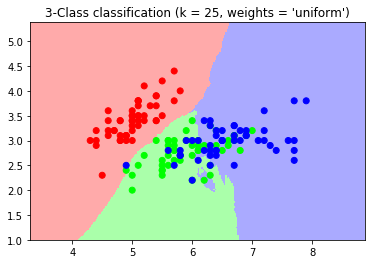

In [4]:
k = 25   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

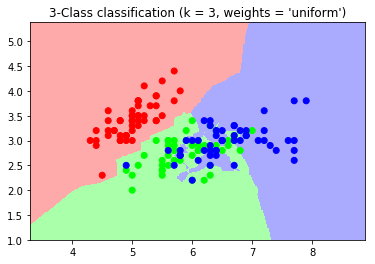

In [5]:
k = 3   # how many nearest neighbors are consulted

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

- I see that the green area expands the size. The X axis of the green area can go from less than 4 to pass 7. Notice that the green area when k = 25 only goes from 4 to less than 7.
- The lines separate these area is not straight but more curly.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

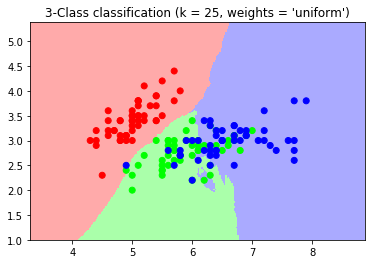

In [6]:
k = 25   # how many nearest neighbors are consulted

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

- When k is big number, when can see that the 3 area became more define. The lines separate these area became more define and straight out. It almost look like a linear line.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

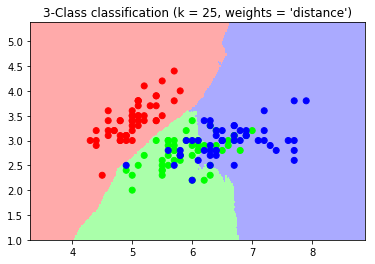

In [7]:
k = 25   # how many nearest neighbors are consulted

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'distance'))
plt.show()

- uniform’ : All points in each neighborhood are weighted equally.
- distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
- With the same value k =3, if we use "distance" the lines separate the area became more define than when we ised "uniform"


**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

- how many nearest neighbors are consulted: k = 25   

- we only take the first two attribute for X: X = iris.data[:, [0,1]] 
-  y will be 0 to 3 for flower type: y = iris.target

- step size in the mesh h = .02

-  Create color maps: cmap_light, cmap_bold
-  we create an instance of Neighbours Classifier and fit the data.
-  Classifier implementing the k-nearest neighbors vote.zz
- clf = neighbors.KNeighborsClassifier(k, weights='uniform')
- Fit the model using X as training data and y as target values: clf.fit(X, y)

- Plot the decision boundary. For that, we will assign a color to each
- point in the mesh [x_min, x_max]x[y_min, y_max].
- x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
- y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


- np.meshgrid Return coordinate matrices from two or more coordinate vectors.
- np.arange(y_min, y_max, h)) return evenly spaced values within a given interval.
- In this case: x_min = 3.3 ,x_max =  8.9, h =0.2
- xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
- Perform classification on samples in data set np.c_[xx.ravel(), yy.ravel()].
- xx.ravel() and  yy.ravel() will return a contiguous flattened array
- so xx and yy will be 2 arrays have 1 row each 
- np.c_ will translates slice objects to concatenation along the second axis.
- xx and yy will combine into array([[x1, x2,...,xn], [y1, y2,...,yn]]
- clf.predict will make a classification of this array. This will return an array with predict value
- Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

-  Put the result into a color plot
- reshape the same of Z so it has the same shape with xx
- Plot the data

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.


Answer 5:
- X train is 100,2
- X test is 50,2
- y train is 100,
- y test is 50,

In [45]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print predictor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [2]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print x
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print np.array(zip(yhat,y_test[i]))

NameError: name 'X_test' is not defined




**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 
- Most of the time I run, It got 2 right and 2 wrong. It's 50% right. Other time I got 25% and 75%. However, they were able to predit those 2 are the same type of flowers. There fore, I think it's not too bad. However, it need more trainning and testing

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses



In [48]:
#x1=0
#for i in range(10):
#    print x1 == yhat[i]
from __future__ import division
m1=0
m2=0
correct=0
guess=len(yhat)
accuracy=0
for i in range(guess):
    m1=yhat[i]
    m2=y_test[i]
    print m1==m2
    if(m1==m2):
        correct+=1

accuracy=(correct/guess)*100
print accuracy ,"%"

True
True
True
True
100.0 %


**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from 


In [49]:
# select all test examples
#create a list of index start from 0
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print np.array(zip(yhat,y_test[i]))

[[2 2]
 [1 1]
 [3 3]
 [4 4]
 [1 4]
 [1 4]
 [1 1]
 [4 4]
 [4 1]
 [1 3]
 [1 1]
 [3 3]
 [1 3]
 [2 2]
 [3 1]
 [1 1]
 [4 3]
 [3 1]
 [4 2]
 [1 2]
 [4 4]
 [4 4]
 [2 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 1]
 [2 4]
 [1 1]
 [3 1]
 [3 4]
 [4 3]
 [4 4]
 [2 2]
 [1 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [2 2]
 [1 1]
 [1 1]
 [4 4]
 [1 4]
 [1 1]
 [1 1]
 [3 2]
 [2 1]
 [2 2]
 [2 1]
 [3 1]
 [4 4]
 [4 4]
 [2 1]
 [1 4]
 [2 2]
 [3 4]
 [1 1]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [1 1]
 [3 4]
 [1 1]
 [2 1]
 [1 1]
 [3 4]
 [3 1]
 [2 1]
 [3 1]
 [2 2]
 [3 1]
 [4 4]
 [2 4]
 [4 1]
 [4 4]
 [2 2]
 [3 1]
 [3 4]
 [4 4]
 [4 3]
 [2 4]
 [3 4]
 [4 2]
 [1 1]
 [4 1]
 [4 2]
 [2 2]
 [4 4]
 [2 4]
 [4 4]
 [3 2]
 [4 4]
 [2 1]
 [1 1]
 [3 3]
 [4 2]
 [4 2]
 [1 3]
 [1 2]
 [4 1]
 [1 2]
 [4 4]
 [1 3]
 [3 2]
 [2 2]
 [4 4]
 [4 4]
 [3 2]
 [4 4]
 [4 4]
 [1 1]
 [4 4]
 [3 1]
 [4 4]
 [4 1]
 [3 1]
 [4 4]
 [1 3]
 [3 4]
 [2 2]
 [4 3]
 [1 1]
 [1 1]
 [2 1]
 [4 2]
 [1 1]
 [1 1]
 [1 2]
 [3 4]
 [2 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [1 2]
 [4 4]
 [2 1]
 [3 3]
 [1 1]

In [50]:
from __future__ import division
m1=0
m2=0
correct=0
guess=len(yhat)
accuracy=0
for i in range(guess):
    m1=yhat[i]
    m2=y_test[i]
    #print m1==m2
    if(m1==m2):
        correct+=1

accuracy=(correct/guess)*100
print accuracy ,"%"

53.9393939394 %


Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [51]:
accuracy = predictor.score(X_test,y_test)
print accuracy

0.5393939393939394


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [52]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]


# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  1  Accuracy:  0.5393939393939394 %


In [53]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 3   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  3  Accuracy:  0.5787878787878787 %


In [54]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 5   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  5  Accuracy:  0.5969696969696969 %


In [55]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 15   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  15  Accuracy:  0.593939393939394 %


In [56]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 25   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  25  Accuracy:  0.5727272727272728 %


In [57]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 50   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  50  Accuracy:  0.6 %


- After a good amount of try, I can say that bigger K gave the highest accuracy

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

**Answer 10**
(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs) are the default parameters
- n_neighbors: contain number of neighbors around
- weights: Uniform, distance
- algorithm : ball_tree, kd_tree, brute auto
- leaf_size: this pass to tree. use to optimal value depends on the nature of the prblem
- p: Power parameter for the Minkowski metric
- metric: he distance metric to use for the tree
- metric_params: Additional keyword arguments for the metric function.
- n_jobs: The number of parallel jobs to run for neighbors search

## Lab 7.B Training kNN classifier on Iris and Newsgroups data
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

In [76]:
#change new pair of attributes
X = iris.data[:, [2,3]]  # we only take the first two features. We could
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [77]:
#Let us train the kNN predictor:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]

# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  1  Accuracy:  0.94 %


- attribute 3 and 4 have highest result


** Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

In [78]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [79]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(50,)

(100, 4)
(50, 4)
(100,)
(50,)

In [80]:
k = 15   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  15  Accuracy:  0.98 %



#### Newsgroups Questions
In Lab you already got experience working with the newsgroups data. 


In [109]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')


**Question News 1**. Since kNN is a relatively slow algorithms, create your data set by picking 1,000 examples randomly. Remember to record both attribute values and labels. Split your data into 66% training and 33% test data sets.

In [110]:
#generate 100 number of index of documents matrix from 0 to documents.shape[0]
import random
randomIndex = random.sample(range(0, documents.shape[0]), 1000)
X=documents[randomIndex,:]
y=newsgroup[randomIndex]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [111]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(330,)

(67, 100)
(33, 100)
(67,)
(33,)

**Question News 2**. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy (pay attention there are 4 types of documents).

In [112]:
import time
#record now time
start_time = time.time()

k = 3   # how many nearest neighbors are consulted
#print X
#print y
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
#total run time = new time - start time
print("Run Time: %s seconds" % (time.time() - start_time))
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

Run Time: 0.0372231006622 seconds
K:  3  Accuracy:  0.6454545454545455 %


In [ ]:
confusion_matrix(y_true, y_pred)

**Question News 3**. Train a kNN classifier using different values of $k$, hoping to improve accuracy. Try to use some other distance other than Euclidean. For example, cosine distance is know to work better than Eucliedean on text data.

In [113]:
k = 20  # how many nearest neighbors are consulted
#print X
#print y
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples/
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  20  Accuracy:  0.6848484848484848 %


**Question Nesw 4**. Transform the original 100 attributes into 5 attributes using SVD. Train and test the kNN on the transformed data. Report the accuracies. You might be surprised to see that accuracy could go up. Discuss why this might be so.

In [123]:
randomIndex = random.sample(range(0, documents.shape[0]), 1000)
X=documents[randomIndex,:]
y=newsgroup[randomIndex]
# SVD
U,s,V = np.linalg.svd(X,full_matrices=0)
print U.shape, s.shape, V.shape

(1000, 100) (100,) (100, 100)


In [124]:
# Calculate rank-5 approximation of X
k = 5
X = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,0:k]))
print X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(1000, 5)


In [125]:
k = 25  # how many nearest neighbors are consulted
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
#print predictor
# select all test examples
i = np.arange(X_test.shape[0])
i[0:X_test.shape[0]]
x = X_test[i,:]
# predict its label
yhat = predictor.predict(x)
accuracy = predictor.score(X_test,y_test)
print "K: ",k," Accuracy: ", accuracy,"%"

K:  25  Accuracy:  0.5545454545454546 %


- My result didn't go up as I expected. However, th